In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\dataframe_.csv')

In [3]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
df.shape
df.size
df.info()

(1697, 2)

3394

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


# Data Cleaning

# Checking Duplicates

In [6]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [7]:
df[df.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop(['index'],axis=1,inplace=True)

In [11]:
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


# Missing Values

In [12]:
df.isna()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1086,False,False
1087,False,False
1088,False,False
1089,False,False


In [13]:
df.isna().sum()

input     1
output    1
dtype: int64

In [14]:
df.input.mean()
df.input.median()
df.input.mode()[0]

8.116185427163302

17.462087345

112.6333313

In [15]:
df.output.mean()
df.output.median()
df.output.mode()[0]

-27.383628220210085

-46.30093846

-95.0

In [16]:
x=df.input.median()
df.input.fillna(x,inplace=True)

In [17]:
df.input[df.input.isna()].sum()

0.0

In [18]:
y=df.output.median()
df.output.fillna(y,inplace=True)

In [19]:
df.output[df.output.isna()].sum()

0.0

In [20]:
df.isna().sum()

input     0
output    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


# Out Liers

In [22]:
df.skew()

input    -0.284121
output    0.923302
dtype: float64

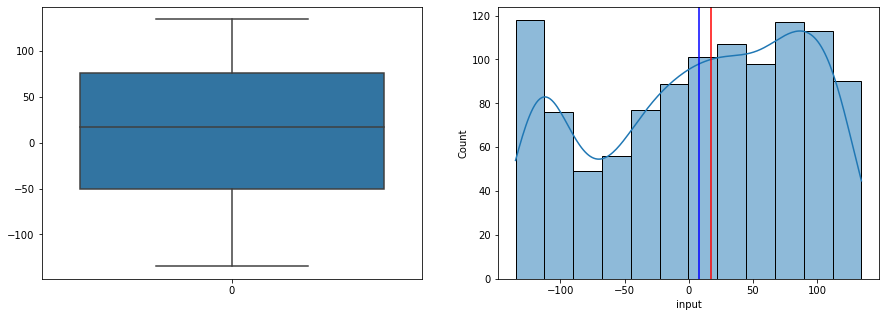

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.input)

plt.subplot(122)
sns.histplot(df.input,kde=True)
plt.axvline(df.input.mean(), color='blue')
plt.axvline(df.input.median(),color='red');

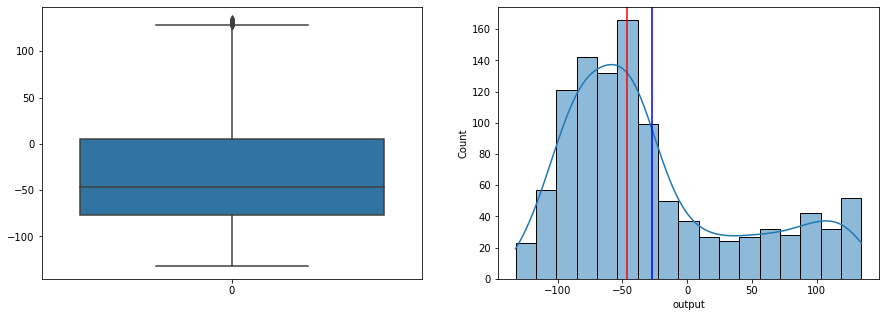

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.output)

plt.subplot(122)
sns.histplot(df.output,kde=True)
plt.axvline(df.output.mean(), color='blue')
plt.axvline(df.output.median(),color='red');

# Analysis

In [25]:
df.head(5)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


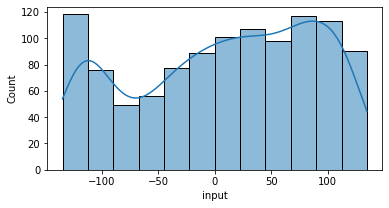

In [26]:
plt.figure(figsize=(6,3))

sns.histplot(df.input.astype(float), kde = True);

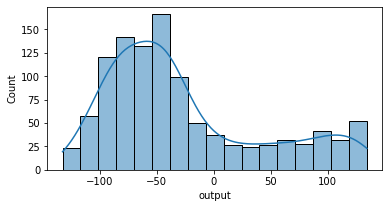

In [27]:
plt.figure(figsize=(6,3))

sns.histplot(df.output.astype(float), kde = True);

<AxesSubplot:>

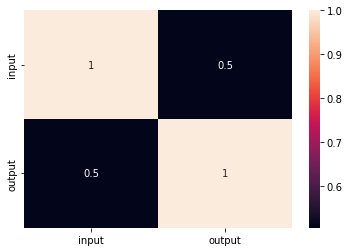

In [28]:
sns.heatmap(df.corr(),annot=True)

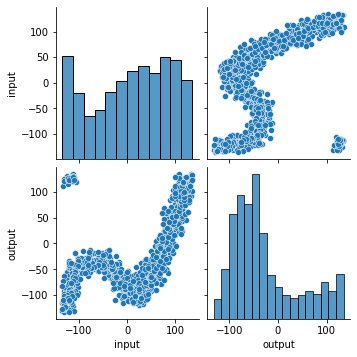

In [29]:
sns.pairplot(df);

 # Data Preparation

# a.Identify the Target Variable and Splitting the Data into Train and Test

In [30]:
# install -U scikit-learn
import sklearn


In [31]:
df.columns

Index(['input', 'output'], dtype='object')

In [32]:
# Identifying the inouts(X) and ouput(y)
y=df['output']
X=df[['input']]

In [33]:
# Data-preprocessing: Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 0)

In [34]:
X_train.head()

,input
255,55.475282
506,80.751526
698,-23.995420
435,100.633331
144,-49.852393


In [35]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


# b.Numerical columns

In [36]:
X_train = X_train.select_dtypes(include=['int64','float64'])

X_train.head()

,input
255,55.475282
506,80.751526
698,-23.995420
435,100.633331
144,-49.852393


# c. Scaling the Numerical Features

In [37]:
X_train.head()

,input
255,55.475282
506,80.751526
698,-23.995420
435,100.633331
144,-49.852393


In [38]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                   columns = X_train.columns,
                                   index = X_train.index)
X_train_rescaled.head()

,input
255,0.614342
506,0.938358
698,-0.404392
435,1.193223
144,-0.735852


In [39]:
X_train.describe()

,input
count,818.000000
mean,7.550896
std,78.056994
min,-134.962839
25%,-50.898327
50%,16.747063
75%,75.962672
max,133.907372


# g.Preparing test Data

In [40]:
X_test.head()

,input
27,-122.366669
650,-1.374273
484,124.641014
803,-117.077690
947,29.091458


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 27 to 978
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [42]:
X_test = X_test.select_dtypes(include=['int64','float64'])
X_test.head()

,input
27,-122.366669
650,-1.374273
484,124.641014
803,-117.077690
947,29.091458


In [43]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                                   columns = X_test.columns,
                                   index = X_test.index)
X_test_rescaled.head()

,input
27,-1.665412
650,-0.114412
484,1.500977
803,-1.597613
947,0.276128


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_rescaled , y_train)

LinearRegression()

In [45]:
y_test_pred = regressor.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

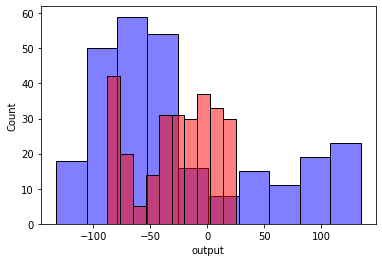

In [46]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,-82.308513
650,-104.595355,-31.812261
484,106.879706,20.780298
803,-38.589729,-80.101154
947,-104.943052,-19.097369


In [48]:
from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_LR)
print('Mean Squared Error: ',MeanSquaredError_LR )
print('Root Mean Squared Error: ',RootMeanSquaredError_LR)

Mean Absolute Error:  48.01354994435236
Mean Squared Error:  3726.4573545258595
Root Mean Squared Error:  61.04471602461477


# KNN Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [50]:
y_test_pred = regressor.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

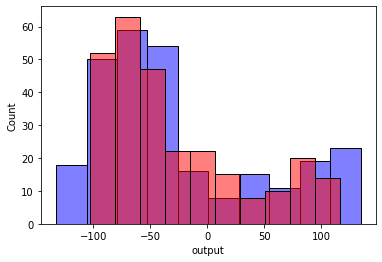

In [51]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [52]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,27.410071
650,-104.595355,-91.956543
484,106.879706,85.346733
803,-38.589729,9.983575
947,-104.943052,-85.591085


In [53]:
MeanAbsoluteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_KNN)
print('Mean Squared Error: ',MeanSquaredError_KNN)
print('Root Mean Squared Error: ',RootMeanSquaredError_KNN)

Mean Absolute Error:  27.096114710908424
Mean Squared Error:  1778.2594293395148
Root Mean Squared Error:  42.16941343366676


# Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_rescaled,y_train)

DecisionTreeRegressor()

In [55]:
y_test_pred = regressor.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

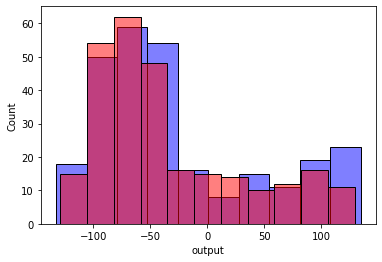

In [56]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [57]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,-89.000000
650,-104.595355,-76.000000
484,106.879706,90.472122
803,-38.589729,-75.000000
947,-104.943052,-82.796934


In [58]:
MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_DTR)
print('Mean Squared Error: ',MeanSquaredError_DTR)
print('Root Mean Squared Error: ',RootMeanSquaredError_DTR )

Mean Absolute Error:  29.58915304669475
Mean Squared Error:  2343.082116921686
Root Mean Squared Error:  48.405393469340645


# Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_rescaled,y_train)

RandomForestRegressor()

In [60]:
y_test_pred = regressor.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

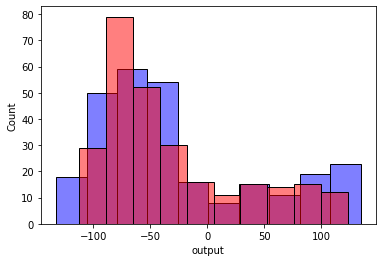

In [61]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [62]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,-14.069049
650,-104.595355,-83.057431
484,106.879706,96.540613
803,-38.589729,-33.301850
947,-104.943052,-82.445995


In [63]:
MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR =  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_RFR )
print('Mean Squared Error: ',MeanSquaredError_RFR)
print('Root Mean Squared Error: ',RootMeanSquaredError_RFR)

Mean Absolute Error:  27.063488159090184
Mean Squared Error:  1862.2696926159103
Root Mean Squared Error:  43.15402290187915


# Gradient Decision Boosting Tree

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_rescaled,y_train)

GradientBoostingRegressor()

In [65]:
y_test_pred = regressor.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

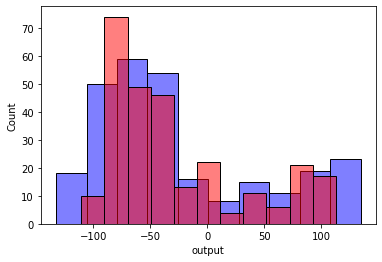

In [66]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [67]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,-76.966913
650,-104.595355,-85.638508
484,106.879706,97.774788
803,-38.589729,-24.467623
947,-104.943052,-82.206858


In [68]:
MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_GBDT)
print('Mean Squared Error: ',MeanSquaredError_GBDT)
print('Root Mean Squared Error: ',RootMeanSquaredError_GBDT)

Mean Absolute Error:  23.850222431568604
Mean Squared Error:  1496.6745621508492
Root Mean Squared Error:  38.68687842345062


# AdaBoost Classifier

In [69]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train_rescaled,y_train)

AdaBoostRegressor()

In [70]:
y_test_pred = ada.predict(X_test_rescaled)

<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

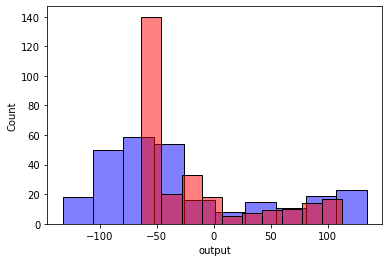

In [71]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [72]:
temp_df= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

temp_df.head()

,Actual,Predicted
27,-86.000000,-19.595819
650,-104.595355,-63.334533
484,106.879706,96.837305
803,-38.589729,-2.759287
947,-104.943052,-63.334533


In [73]:
MeanAbsoluteError_ADA = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_ADA = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ADA = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_ADA)
print('Mean Squared Error: ',MeanSquaredError_ADA)
print('Root Mean Squared Error: ',RootMeanSquaredError_ADA)

Mean Absolute Error:  31.106611407207822
Mean Squared Error:  1915.6957393685148
Root Mean Squared Error:  43.76866161271686


In [74]:
data=[['Linear Regression',MeanAbsoluteError_LR,MeanSquaredError_LR,RootMeanSquaredError_LR],
      ['KNN Regression',MeanAbsoluteError_KNN,MeanSquaredError_KNN,RootMeanSquaredError_KNN],
     ['Decision Tree Regression',MeanAbsoluteError_DTR,MeanSquaredError_DTR,RootMeanSquaredError_DTR ],
     ['Random Forest Regression',MeanAbsoluteError_RFR,MeanSquaredError_RFR,RootMeanSquaredError_RFR],
     ['Gradient Boosting Tree',MeanAbsoluteError_GBDT,MeanSquaredError_GBDT,RootMeanSquaredError_GBDT],
     ['AdaBoost Classifier',MeanAbsoluteError_ADA,MeanSquaredError_ADA,RootMeanSquaredError_ADA]]
result=pd.DataFrame(data,columns = ['Algorithms','Mean_Absolute_Error','Mean_Squared_Error','Root_Mean_Squared_Error'])

In [75]:
result

,Algorithms,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error
0,Linear Regression,48.013550,3726.457355,61.044716
1,KNN Regression,27.096115,1778.259429,42.169413
2,Decision Tree Regression,29.589153,2343.082117,48.405393
3,Random Forest Regression,27.063488,1862.269693,43.154023
4,Gradient Boosting Tree,23.850222,1496.674562,38.686878
5,AdaBoost Classifier,31.106611,1915.695739,43.768662


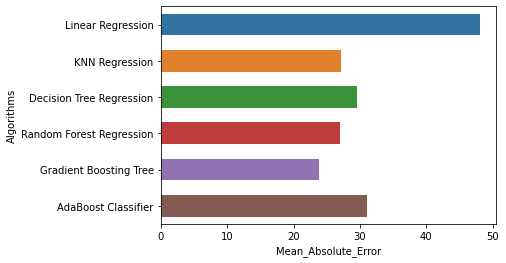

In [76]:
sns.barplot(y=result.Algorithms,x=result.Mean_Absolute_Error,width=0.6);

# Conclusion

* By observing all the algorithms `GBDT(Gradient Boosting Decision Tree)` is best model to predict 
* Because GBDT algorithm giving less mean absolute error which is `23.850222`